I57_new_confidence
/Users/dennis.jungchildmind.org/Desktop/exvivo_postslurm/at_inf_surface/output_960um_method0/output_120um_max_960um_dist_method0/I57_new_confidence/lh/inf_120um_method0_manual_raw_intensity.npz
Loaded ex-vivo subject: I57, hemisphere: lh
/Users/dennis.jungchildmind.org/Desktop/exvivo_postslurm/at_inf_surface/output_960um_method0/output_120um_max_960um_dist_method0/I57_new_confidence/rh/inf_120um_method0_manual_raw_intensity.npz
I58_new_confidence
/Users/dennis.jungchildmind.org/Desktop/exvivo_postslurm/at_inf_surface/output_960um_method0/output_120um_max_960um_dist_method0/I58_new_confidence/lh/inf_120um_method0_manual_raw_intensity.npz
Loaded ex-vivo subject: I58, hemisphere: lh
/Users/dennis.jungchildmind.org/Desktop/exvivo_postslurm/at_inf_surface/output_960um_method0/output_120um_max_960um_dist_method0/I58_new_confidence/rh/inf_120um_method0_manual_raw_intensity.npz
I45_new_confidence
/Users/dennis.jungchildmind.org/Desktop/exvivo_postslurm/at_inf_surface/output_

/var/folders/71/4g31r9017kq32wt_mx1khjdm0000gn/T/ipykernel_6771/211958997.py:76: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  data_array = zscore(data_array, axis=0)
/var/folders/71/4g31r9017kq32wt_mx1khjdm0000gn/T/ipykernel_6771/211958997.py:76: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  data_array = zscore(data_array, axis=0)


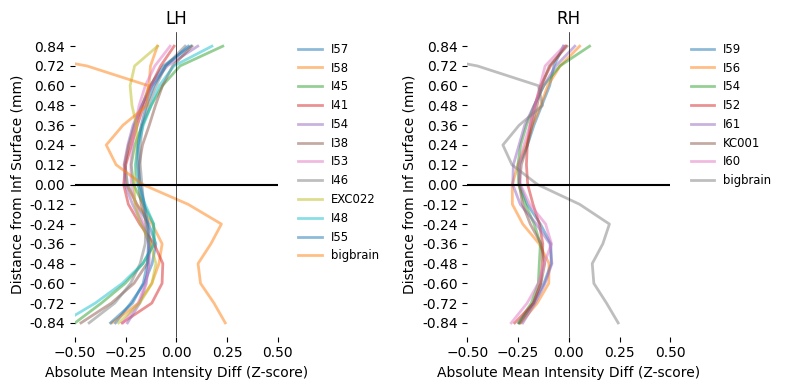

Data shape: (15, 32492)
Distance array: [ 0.84  0.72  0.6   0.48  0.36  0.24  0.12  0.   -0.12 -0.24 -0.36 -0.48
 -0.6  -0.72 -0.84]
Zero index: 7
Depths - Zero: 0.000, Up: -0.120, Down: 0.120


In [8]:
"""
Post-processing analysis script for cortical layer intensity data.
This code processes and visualizes results from quality_control_native_surface_slurm.py

#use conda env: niwrap3912
"""
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, gaussian_kde
from scipy.stats import linregress
import pickle


# ============================================================================
# CONFIGURATION PARAMETERS
# ============================================================================

# Data parameters
LAYER_TYPE = 'inf' #parameters can be 'inf', 'pial', 'white'
RESOLUTION = '120um'  # 120um or 240um
DEPTH = '960um' #960 or 2000um
STEPS = 1
# Analysis parameters
data_type = "diff" #"raw" or "diff'"
do_zscore = True
do_zscore_before_diff = True
do_abs_on_diff = False
add_bigbrain = True
add_exvivo = True
    
# File paths
base_path = "/Users/dennis.jungchildmind.org/Desktop/exvivo"

#data_base_path = f"/Users/dennis.jungchildmind.org/Desktop/exvivo_postslurm/at_inf_surface/output_{DEPTH}_method0/output_{RESOLUTION}_max_{DEPTH}_dist_method0"
data_base_path = f"/Users/dennis.jungchildmind.org/Desktop/exvivo_postslurm/at_{LAYER_TYPE}_surface/output_{DEPTH}_method0/output_{RESOLUTION}_max_{DEPTH}_dist_method0"
bigbrain_base_path = '/Users/dennis.jungchildmind.org/Desktop/BigBrain/PlosBiology2020gii'



# Visualization parameters
xlim_max = 0.5#1.5
figure_size_depth_profiles = (8, 4)
figure_size_kde = (14, 4)
figure_size_scatter = (4, 3)

# Analysis depth positions (relative to zero index)
if RESOLUTION == '120um':
    voxel_offset_up = STEPS
    voxel_offset_down = -STEPS
else:
    voxel_offset_up =1
    voxel_offset_down = -1

# KDE parameters
kde_x_range = (-10, 10)
kde_n_points = 500

# ============================================================================
# DATA PROCESSING FUNCTIONS
# ============================================================================

# Initialize data containers
all_data = {
    'lh': {'intensity_data': [], 'subject_names': []},
    'rh': {'intensity_data': [], 'subject_names': []}
}

def process_intensity_data(data_array, data_type, do_zscore):
    """Process intensity data with optional differencing and z-scoring."""
    
    if data_type == 'diff':
        # Apply z-scoring before differencing if requested
        if do_zscore_before_diff:
            if do_zscore:
                data_array = zscore(data_array, axis=0)
            data_array = (np.diff(data_array, axis=0))
            if do_abs_on_diff:
                data_array = np.abs(data_array)
        elif do_zscore_before_diff == False:
            data_array = (np.diff(data_array, axis=0))
            if do_abs_on_diff:
                data_array = np.abs(data_array)
            if do_zscore:
                data_array = zscore(data_array, axis=0)
        
    
            
    elif data_type == 'raw':
        # Apply z-scoring for raw data if requested
        if do_zscore:
            data_array = zscore(data_array, axis=0)
            
    else:
        raise ValueError(f"Invalid data_type: {data_type}. Must be 'diff' or 'raw'")

    return data_array


if add_exvivo:
    # Process ex-vivo subjects
    for subjects in os.listdir(base_path):
        if subjects:
            print(subjects)
            for hemispheres in ['lh', 'rh']:
                intensity_file_path = os.path.join(
                    data_base_path, subjects, 
                    f"{hemispheres}/{LAYER_TYPE}_{RESOLUTION}_method0_manual_raw_intensity.npz"
                )

                print(intensity_file_path)
                if os.path.exists(intensity_file_path):
                    data = np.load(intensity_file_path, allow_pickle=True)
                    dist_array = data['dist_array']
                    
                    # Process data
                    tmp_dat = process_intensity_data(data['all_values'], data_type, do_zscore)
                    
                    # Store data by hemisphere
                    clean_subject_name = subjects.replace('_new_confidence', '')
                    print(f"Loaded ex-vivo subject: {clean_subject_name}, hemisphere: {hemispheres}")
                    
                    all_data[hemispheres]['intensity_data'].append(tmp_dat)
                    all_data[hemispheres]['subject_names'].append(clean_subject_name)
                    dist_array = data['dist_array']

if add_bigbrain:
    # Load BigBrain data
    for hemi in ['lh', 'rh']:
        #specify the layer surface for the BigBrain data to match the ex vivo data
        if LAYER_TYPE == 'inf':
            #LAYER_SURFACE = 'layer3'#default, presumably mathcing the ex vivo
            LAYER_SURFACE = 'layer3'
            SUBPATH = 'at_inf_surface'
        elif LAYER_TYPE == 'pial':
            LAYER_SURFACE = 'layer0'
            SUBPATH = 'at_pial_surface'
        elif LAYER_TYPE == 'white':
            LAYER_SURFACE = 'layer6'
            SUBPATH = 'at_white_surface'
        else:
            raise ValueError(f"Invalid LAYER_TYPE: {LAYER_TYPE}")

        bb_file_path = os.path.join(bigbrain_base_path, SUBPATH, f'bigbrain_{hemi}_{LAYER_SURFACE}_{RESOLUTION}_max_{DEPTH}_method0_manual_raw_intensity.npz')
        
        if os.path.exists(bb_file_path):
            bb_data = np.load(bb_file_path)['all_values']
            bb_data = process_intensity_data(bb_data, data_type, do_zscore)
            
            all_data[hemi]['intensity_data'].append(bb_data)
            all_data[hemi]['subject_names'].append('bigbrain')
            print(f"Loaded BigBrain data for hemisphere: {hemi}")


        dist_array = np.load(bb_file_path)['dist_array']
# Find zero index for distance array
zero_indices = np.where(dist_array == 0)[0]
if len(zero_indices) > 0:
    zero_index = zero_indices[0]
else:
    zero_index = np.argmin(np.abs(dist_array))
    print(f"No exact zero found, using closest value at index {zero_index} with value {dist_array[zero_index]}")

# Create convenient access variables
lh_intensity_data_uncut = all_data['lh']['intensity_data']
rh_intensity_data_uncut = all_data['rh']['intensity_data']
lh_subject_names = all_data['lh']['subject_names']
rh_subject_names = all_data['rh']['subject_names']

# Print summary
print(f"\nData loading summary:")
print(f"Left hemisphere: {len(lh_subject_names)} subjects - {lh_subject_names}")
print(f"Right hemisphere: {len(rh_subject_names)} subjects - {rh_subject_names}")

# Calculate rolling average of consecutive pairs for distance array
dist_array_avg = np.array([(dist_array[i] + dist_array[i + 1]) / 2 for i in range(len(dist_array) - 1)])
print(f"Distance array average: {dist_array_avg}")

# Plot depth profiles for both hemispheres
plt.figure(figsize=figure_size_depth_profiles)

for subplot_idx, (hemi, subject_names, subject_data) in enumerate([
    ('lh', lh_subject_names, lh_intensity_data_uncut),
    ('rh', rh_subject_names, rh_intensity_data_uncut)
], 1):
    
    plt.subplot(1, 2, subplot_idx)

    # Plot each subject
    grand_average_intensity = []
    for i, tmp in enumerate(subject_data):
        mean_intensity = np.nanmean(tmp, axis=1)
        #sem_intensity = np.nanstd(tmp, axis=1) / np.sqrt(tmp.shape[1] - 1)
        std_intensity = np.nanstd(tmp, axis=1)
        yvals = []
        if data_type == 'raw':
            yvals = dist_array
        elif data_type == 'diff':
            yvals = dist_array_avg
        
        # Plot a continuous errorbar (line with shaded error region)
        plt.plot(mean_intensity, yvals, '-', linewidth=2, alpha=0.5, label=subject_names[i])
        
        if data_type != 'diff':
            plt.fill_betweenx(yvals, mean_intensity - std_intensity, mean_intensity + std_intensity, 
                            alpha=0.1, linewidth=0, label=None)
            
        grand_average_intensity.append(mean_intensity)

    # Plot grand average
    grand_average_intensity = np.nanmean(grand_average_intensity, axis=0)
    if not add_bigbrain and add_exvivo:
        plt.plot(grand_average_intensity, yvals, 'k-', linewidth=4, 
                 alpha=1, label='Grand Average', zorder=0)
    
    # Formatting
    if do_zscore:
        #plt.xlim(-xlim_max, 0.1) exvivo
        plt.xlim(-xlim_max,xlim_max)
        if do_abs_on_diff:
            plt.xlim(0.2,xlim_max+0.1) #exvivo
            #plt.xlim(0.1,xlim_max+0.2) #bigbrain

    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
    if data_type == 'diff':
        plt.xlabel('Absolute Mean Intensity Diff (Z-score)')
    else:
        plt.xlabel('Mean Intensity (Z-score, ±std)')
    plt.ylabel('Distance from Inf Surface (mm)')
    #show every ytick label
    plt.yticks(yvals, [f'{y:.2f}' for y in yvals])
    plt.title(f'{hemi.upper()}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', frameon=False)
    
    # Remove spines
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

# Analyze intensity data at specific depth positions
print(f"Data shape: {subject_data[0].shape}")
print(f"Distance array: {dist_array_avg}")

# Find key depth positions using configured offsets
zero_index = np.where(dist_array_avg == 0)[0][0]
x_voxel_up = zero_index + voxel_offset_up
x_voxel_down = zero_index + voxel_offset_down

print(f"Zero index: {zero_index}")
print(f"Depths - Zero: {dist_array_avg[zero_index]:.3f}, Up: {dist_array_avg[x_voxel_up]:.3f}, Down: {dist_array_avg[x_voxel_down]:.3f}")


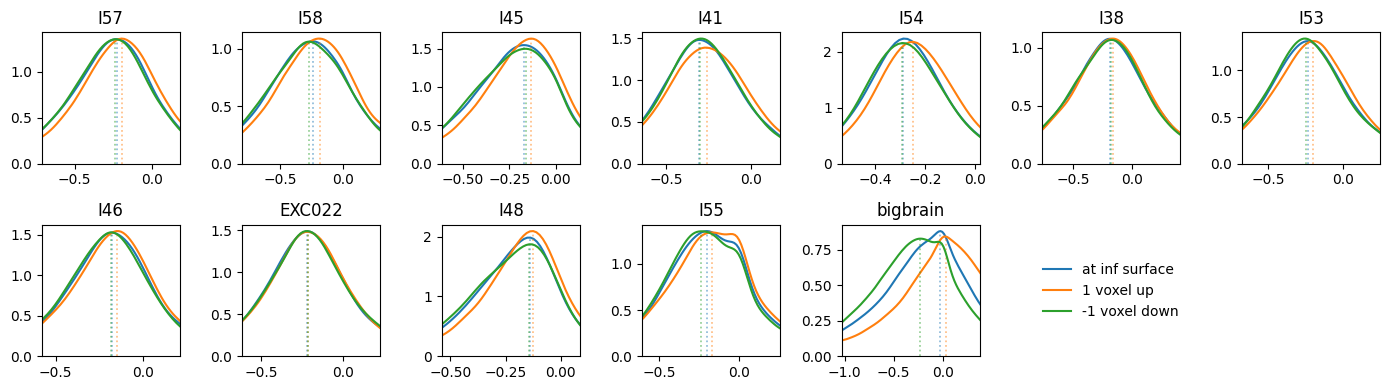

In [9]:
# Plot KDE distributions for each subject
hemi = 'lh'
subject_data = lh_intensity_data_uncut if hemi == 'lh' else rh_intensity_data_uncut
subject_names = lh_subject_names if hemi == 'lh' else rh_subject_names
n_subjects = len(subject_data)

fig, axes = plt.subplots(2, 7, figsize=figure_size_kde)
axes = axes.flatten()


# Storage for peak distances
peak_distances_all_subjects = {
    'at_surface': [],
    'x_voxel_up': [],
    'x_voxel_down': []
}

# Define positions for analysis
positions = [
    (zero_index, f'at {LAYER_TYPE} surface', 'at_surface'),
    (x_voxel_up, f'{voxel_offset_up} voxel up', 'x_voxel_up'),
    (x_voxel_down, f'{voxel_offset_down} voxel down', 'x_voxel_down')
]

for i, tmp in enumerate(subject_data):
    ax = axes[i]
    tmp = np.where(~np.isnan(tmp), tmp, 0)  # Remove NaN values
    
    for pos_idx, label, key in positions:
        tmp_kde = tmp[pos_idx, :]
        #check if there is any Nan values
        #x_range = np.linspace(kde_x_range[0], kde_x_range[1], kde_n_points)
        x_range = np.linspace(np.nanmin(tmp_kde), np.nanmax(tmp_kde), kde_n_points)
        kde = gaussian_kde(tmp_kde)
        kde_vals = kde(x_range)
        line = ax.plot(x_range, kde_vals, alpha=1, linewidth=1.5, label=label)
        
        # Add peak indicator and store peak distance
        peak_idx = np.argmax(kde_vals)
        peak_x, peak_y = x_range[peak_idx], kde_vals[peak_idx]
        ax.plot([peak_x, peak_x], [0, peak_y], ':', alpha=0.5, 
                linewidth=1.25, color=line[0].get_color())
        
        peak_distances_all_subjects[key].append(peak_x)
    
    #if do_zscore:
        #ax.set_xlim(-0.4,0.2)
      #  ax.set_xlim(-0.4,0.4)
    #else:
        #ax.set_xlim(np.nanpercentile(tmp[pos_idx, :], 20), np.nanpercentile(tmp[pos_idx, :],90)) #for inf
        ax.set_xlim(np.nanpercentile(tmp[pos_idx, :], 10), np.nanpercentile(tmp[pos_idx, :],90)) #for white

    ax.set_ylim(bottom=0)
    ax.set_title(f'{subject_names[i]}')

# Add legend
if n_subjects < len(axes):
    legend_ax = axes[n_subjects]
    legend_ax.axis('off')
    for pos_idx, label, key in positions:
        legend_ax.plot([], [], alpha=1, linewidth=1.5, label=label)
    legend_ax.legend(loc='center', frameon=False)

# Hide remaining empty subplots
for j in range(n_subjects + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



Peak distances for all subjects:
at_surface: [np.float64(-0.2272890581434548), np.float64(-0.24185774436682594), np.float64(-0.17165724245275715), np.float64(-0.31082515099171104), np.float64(-0.2882701621550918), np.float64(-0.18917090041805018), np.float64(-0.2340294984094884), np.float64(-0.17591287077416728), np.float64(-0.21846109556761206), np.float64(-0.13730321284466118), np.float64(-0.20210854668134726), np.float64(-0.02507135324380183)]
  Mean: -0.202, Std: 0.071
x_voxel_up: [np.float64(-0.19631812859362707), np.float64(-0.18396952381059695), np.float64(-0.13202506052681873), np.float64(-0.26040972435523013), np.float64(-0.24866803482648692), np.float64(-0.16272080042650838), np.float64(-0.20358628996080386), np.float64(-0.1495897806598263), np.float64(-0.2121485937551375), np.float64(-0.12481953766498144), np.float64(-0.17326162504067), np.float64(0.027421162439408953)]
  Mean: -0.168, Std: 0.071
x_voxel_down: [np.float64(-0.2375674093342064), np.float64(-0.2687755981240061

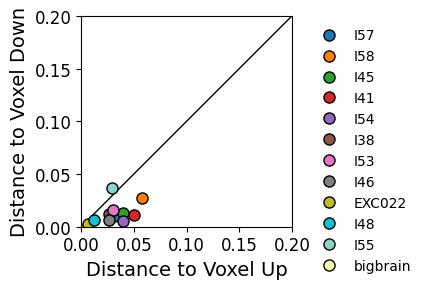

In [10]:

# Print peak distances summary
print("\nPeak distances for all subjects:")
for key, values in peak_distances_all_subjects.items():
    print(f"{key}: {values}")
    print(f"  Mean: {np.mean(values):.3f}, Std: {np.std(values):.3f}")

# Convert to numpy arrays for analysis
at_inf_surface = np.array(peak_distances_all_subjects['at_surface'])
voxel_up = np.array(peak_distances_all_subjects['x_voxel_up'])
voxel_down = np.array(peak_distances_all_subjects['x_voxel_down'])

# Create scatter plot with distinguished colors
n_subjects = len(subject_names)
colors = plt.cm.tab10(np.arange(n_subjects)) if n_subjects <= 10 else \
         np.vstack([plt.cm.tab10(np.arange(10)), plt.cm.Set3(np.arange(n_subjects - 10))])

plt.figure(figsize=figure_size_scatter)
for i, subject_name in enumerate(subject_names):
    plt.plot(abs(voxel_up[i] - at_inf_surface[i]), 
             abs(voxel_down[i] - at_inf_surface[i]), 'o', 
             color=colors[i], label=subject_name, markersize=8, 
             markeredgecolor='black')

plt.legend(subject_names, bbox_to_anchor=(1.05, 1), loc='upper left', 
           frameon=False, fontsize=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Distance to Voxel Up', fontsize=14)
plt.ylabel('Distance to Voxel Down', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.plot([0, 1.5], [0, 1.5], 'k-', linewidth=1, zorder=0)  # x=y line
if do_zscore:
    plt.xlim(0, 0.2)
    plt.ylim(0, 0.2)
plt.tight_layout()
plt.show()

#voxels_up = np.abs(voxel_up - at_inf_surface)
#voxels_down = np.abs(voxel_down - at_inf_surface)


new 12 ['I54', 'I57', 'I58', 'I45', 'I41', 'I38', 'I53', 'I46', 'EXC022', 'I48', 'I55', 'bigbrain']
var_wo_bigbrain shape: (11,)
thickness_corr_wrt_bigbrain_wo_bigbrain shape: (11,)
subject_names_wo_bigbrain length: 11
-0.9512889821557973
var_wo_bigbrain shape: (11,)
thickness_corr_wrt_bigbrain_wo_bigbrain shape: (11,)
subject_names_wo_bigbrain length: 11
-1.8672321475506015


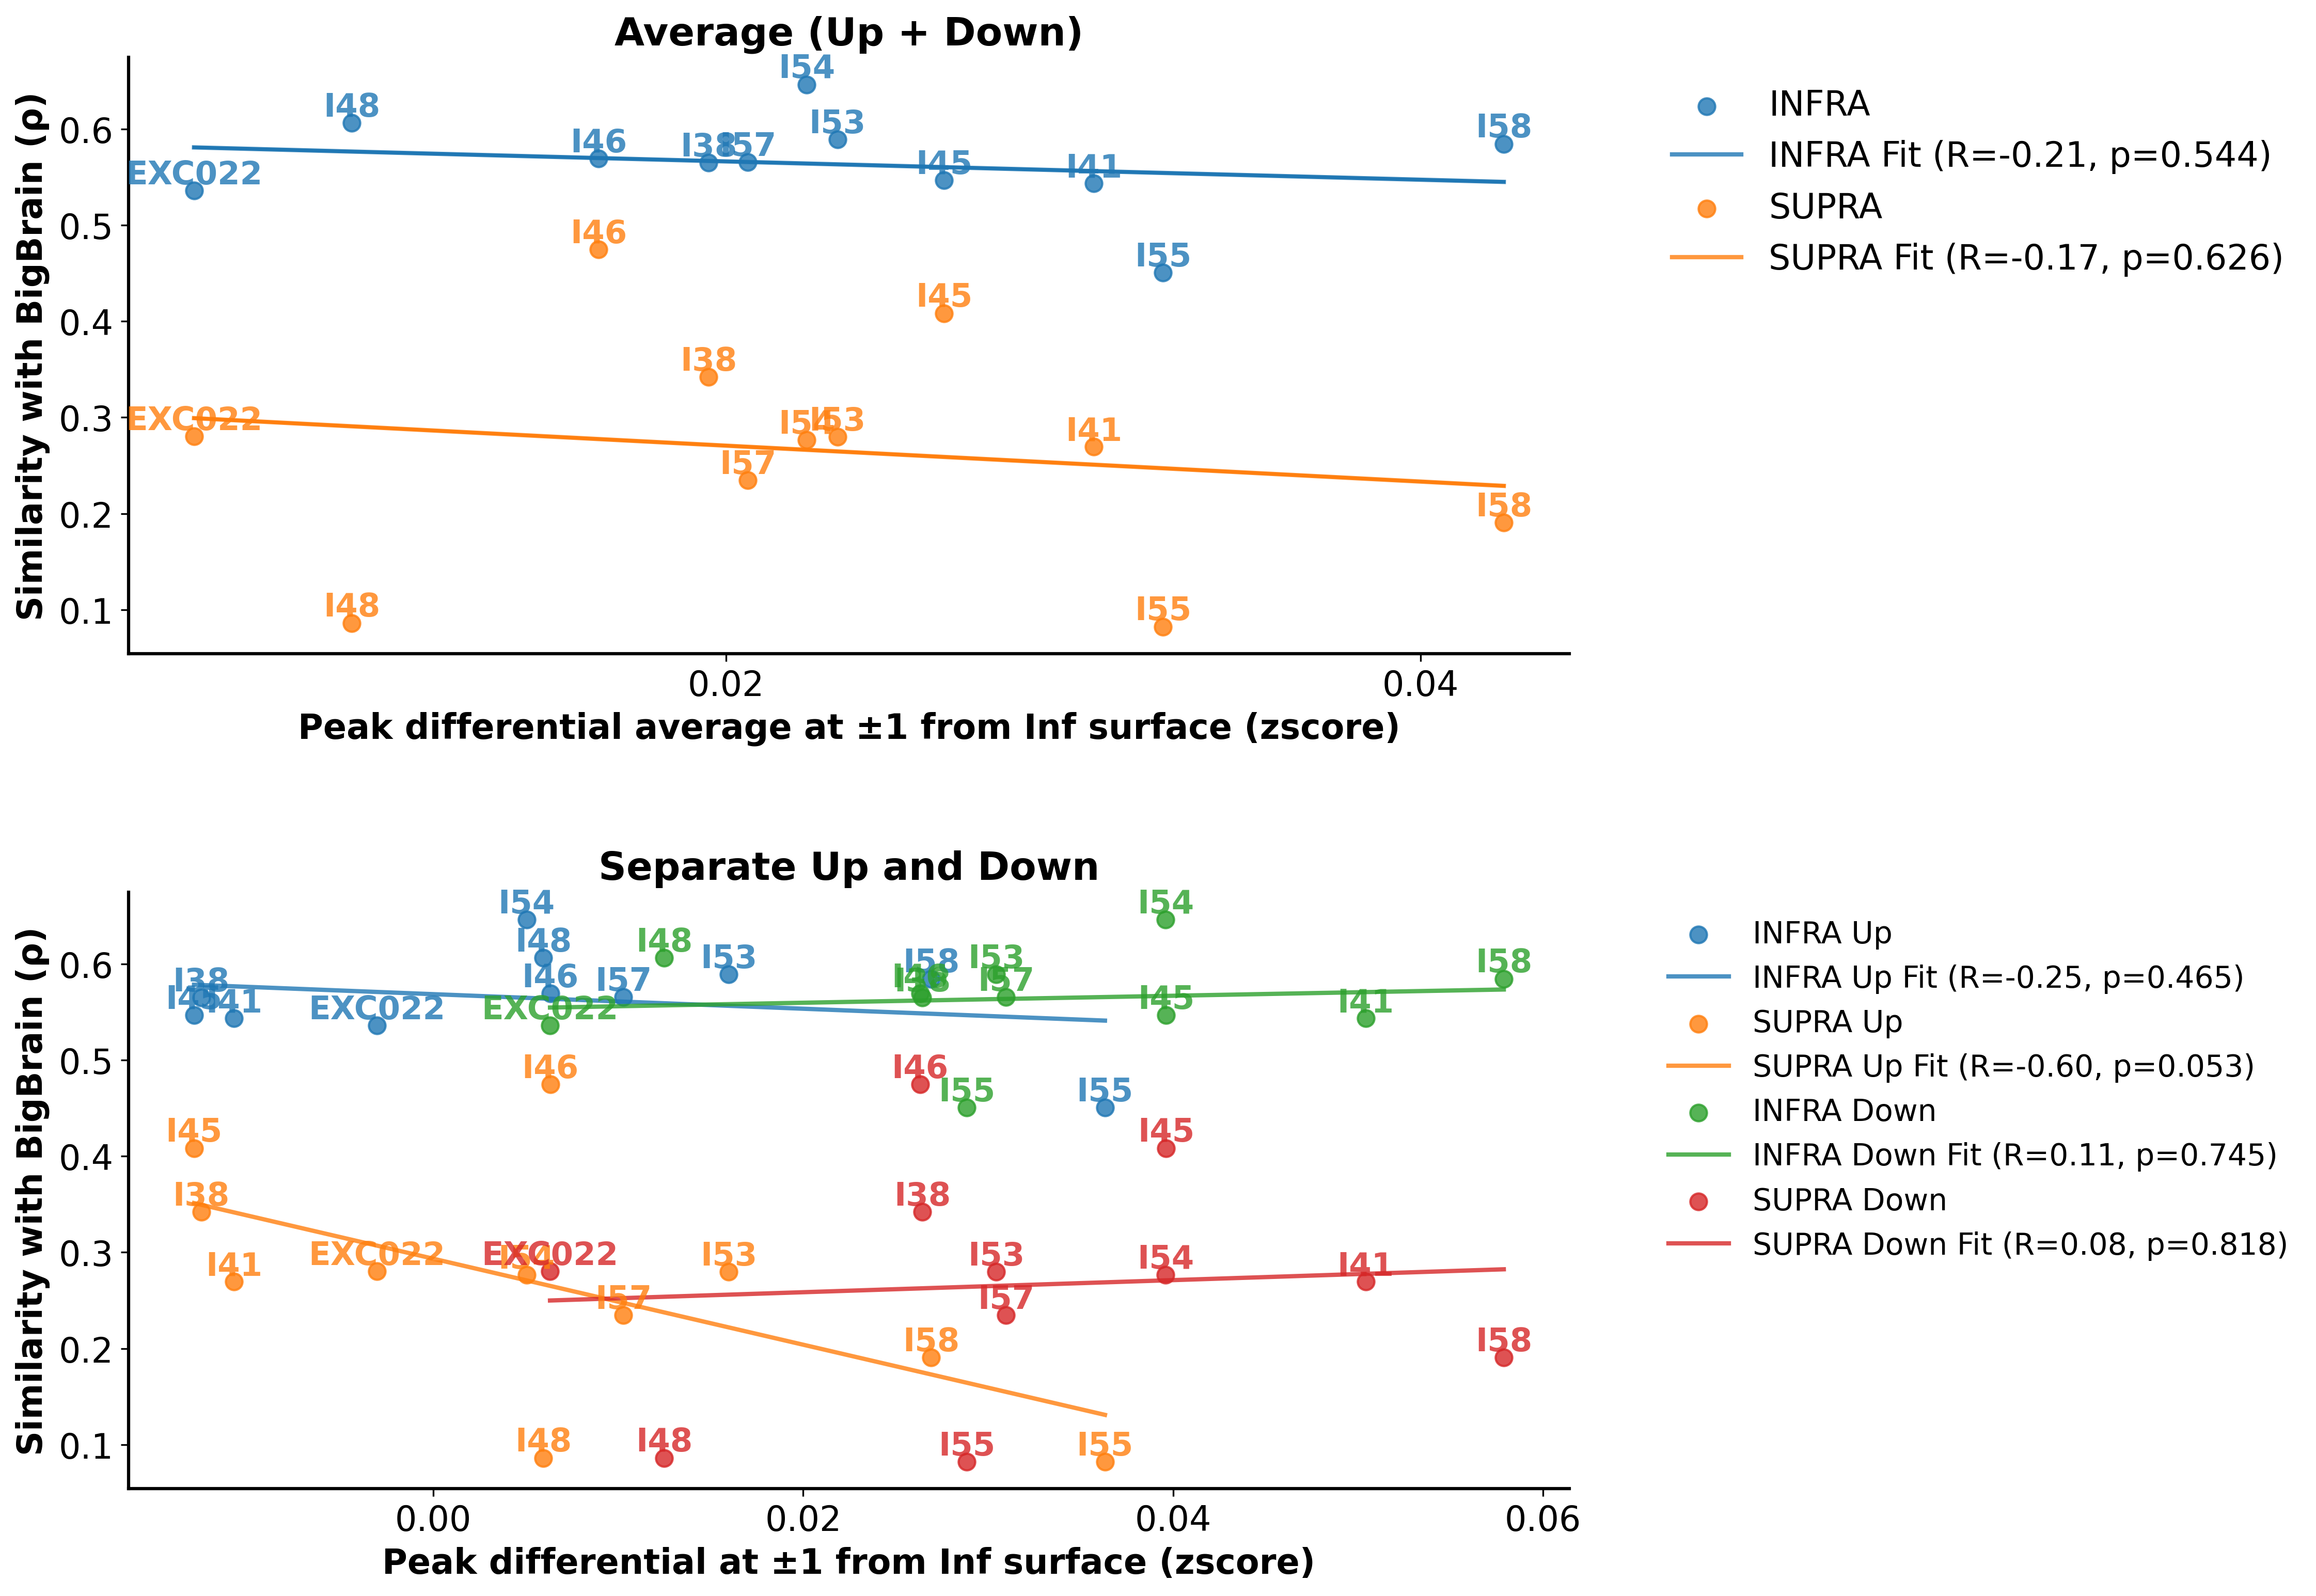

In [11]:

#load the correlation data (from visualize_brain.ipynb)
#/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/visualization
'''
with open('/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/visualization/thickness_corr_wrt_bigbrain_32k.pkl', 'rb') as f:
    data = pickle.load(f)
    subject_names_corr = data['subject_names']
    thickness_corr_wrt_bigbrain = data['thickness_corr_wrt_bigbrain']

'''
with open('/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/visualization/thickness_corr_wrt_bigbrain.pkl', 'rb') as f:
    data = pickle.load(f)
    subject_names_corr = data['subject_names']
    thickness_corr_wrt_bigbrain = data['thickness_corr_wrt_bigbrain']

#get the reorder index of the subject names_corr[hemi] in subject_names
reorder_index = [subject_names.index(subject) for subject in subject_names_corr[hemi]]
#reorder subject_names with the reorder_index
subject_names_reordered = [subject_names[i] for i in reorder_index]
print('new',len(subject_names_reordered),subject_names_reordered)


fontsize = 16
voxel_ave = (np.abs(voxel_up-at_inf_surface) + np.abs(voxel_down-at_inf_surface)) / 2

# Create 2x1 subplot figure with spacing
fig, axes = plt.subplots(2,1,figsize=(12, 12), dpi=300)
plt.subplots_adjust(hspace=0.4)  # Add vertical spacing between subplots

# Plot 1: Average
voxels_all = [voxel_ave]
ax = axes[0]
for i, independent_variable in enumerate(voxels_all):
    var_= independent_variable[reorder_index]#this should be reordered so that it matches with the thickness_corr_wrt_bigbrain
    
    for j, layer_type in enumerate(['infra','supra']):
        var_wo_bigbrain = np.array(var_[:-1])
        thickness_corr_wrt_bigbrain_wo_bigbrain = np.array(thickness_corr_wrt_bigbrain[hemi][layer_type][:-1])
        subject_names_wo_bigbrain = subject_names_reordered[:-1]
        
        print(f"var_wo_bigbrain shape: {var_wo_bigbrain.shape}")
        print(f"thickness_corr_wrt_bigbrain_wo_bigbrain shape: {thickness_corr_wrt_bigbrain_wo_bigbrain.shape}")
        print(f"subject_names_wo_bigbrain length: {len(subject_names_wo_bigbrain)}")
        
        #the last value of the thickness_corr_wrt_bigbrain and var_ is from the bigbrain, so don't include it
        scatter = ax.scatter(var_wo_bigbrain, thickness_corr_wrt_bigbrain_wo_bigbrain, 
                    label=layer_type.upper(), s=60, alpha=0.8)
        
        #calculate linear regression
        slope, intercept, r_value, p_value, std_err = linregress(var_wo_bigbrain, thickness_corr_wrt_bigbrain_wo_bigbrain)
        
        #plot the linear regression line
        x_line = np.linspace(var_wo_bigbrain.min(), var_wo_bigbrain.max(), 100)
        y_line = slope * x_line + intercept
        print(slope)
        ax.plot(x_line, y_line, 
                label=f'{layer_type.upper()} Fit (R={r_value:.2f}, p={p_value:.3f})', 
                linewidth=2, alpha=0.8, color=scatter.get_facecolors()[0])
        ax.plot(x_line, y_line)
        for k, subject in enumerate(subject_names_wo_bigbrain):
            ax.annotate(subject, (var_wo_bigbrain[k], thickness_corr_wrt_bigbrain_wo_bigbrain[k]), 
                        fontsize=fontsize-1, ha='center', va='bottom', alpha=0.8, fontweight='bold',
                        color=scatter.get_facecolors()[0])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=fontsize)  
ax.set_xlabel(f'Peak differential average at ±{voxel_offset_up} from {LAYER_TYPE.capitalize()} surface (zscore)', fontsize=fontsize, fontweight='bold')
ax.set_ylabel('Similarity with BigBrain (ρ)', fontsize=fontsize, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.locator_params(axis='x', nbins=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_title('Average (Up + Down)', fontsize=fontsize+2, fontweight='bold')

# Plot 2: Non-average (separate up and down)
#voxels_all = [np.abs(voxel_up), np.abs(voxel_down)]
#voxel_ave = (np.abs(voxel_up-at_inf_surface) + np.abs(voxel_down-at_inf_surface)) / 2
voxels_all = [at_inf_surface-voxel_down, voxel_up-at_inf_surface]
ax = axes[1]
for i, independent_variable in enumerate(voxels_all):
    var_= independent_variable[reorder_index]#this should be reordered so that it matches with the thickness_corr_wrt_bigbrain
    
    direction = 'Up' if i == 0 else 'Down'
    
    for j, layer_type in enumerate(['infra','supra']):
        var_wo_bigbrain = np.array(var_[:-1])
        thickness_corr_wrt_bigbrain_wo_bigbrain = np.array(thickness_corr_wrt_bigbrain[hemi][layer_type][:-1])
        subject_names_wo_bigbrain = subject_names_reordered[:-1]
        
        #the last value of the thickness_corr_wrt_bigbrain and var_ is from the bigbrain, so don't include it
        scatter = ax.scatter(var_wo_bigbrain, thickness_corr_wrt_bigbrain_wo_bigbrain, 
                    label=f'{layer_type.upper()} {direction}', s=60, alpha=0.8)
        
        #calculate linear regression
        slope, intercept, r_value, p_value, std_err = linregress(var_wo_bigbrain, thickness_corr_wrt_bigbrain_wo_bigbrain)
        
        #plot the linear regression line
        x_line = np.linspace(var_wo_bigbrain.min(), var_wo_bigbrain.max(), 100)
        y_line = slope * x_line + intercept
        ax.plot(x_line, y_line, 
                label=f'{layer_type.upper()} {direction} Fit (R={r_value:.2f}, p={p_value:.3f})', 
                linewidth=2, alpha=0.8, color=scatter.get_facecolors()[0])
        
        for k, subject in enumerate(subject_names_wo_bigbrain):
            ax.annotate(subject, (var_wo_bigbrain[k], thickness_corr_wrt_bigbrain_wo_bigbrain[k]), 
                        fontsize=fontsize-1, ha='center', va='bottom', alpha=0.8, fontweight='bold',
                        color=scatter.get_facecolors()[0])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=fontsize-2)  
ax.set_xlabel(f'Peak differential at ±{voxel_offset_up} from {LAYER_TYPE.capitalize()} surface (zscore)', fontsize=fontsize, fontweight='bold')
ax.set_ylabel('Similarity with BigBrain (ρ)', fontsize=fontsize, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.locator_params(axis='x', nbins=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_title('Separate Up and Down', fontsize=fontsize+2, fontweight='bold')

#plt.tight_layout()
#save the figure
SUBPATH = 'corr_wrt_bigbrain_figure'
#create subfolder if it doesn't exist
#os.makedirs(SUBPATH, exist_ok=True)
#plt.savefig(f'{SUBPATH}/{hemi}_thickness_corr_wrt_bigbrain_{layer_type}_{RESOLUTION}.png', dpi=300)
#
#plt.close()


new 12 ['I54', 'I57', 'I58', 'I45', 'I41', 'I38', 'I53', 'I46', 'EXC022', 'I48', 'I55', 'bigbrain']


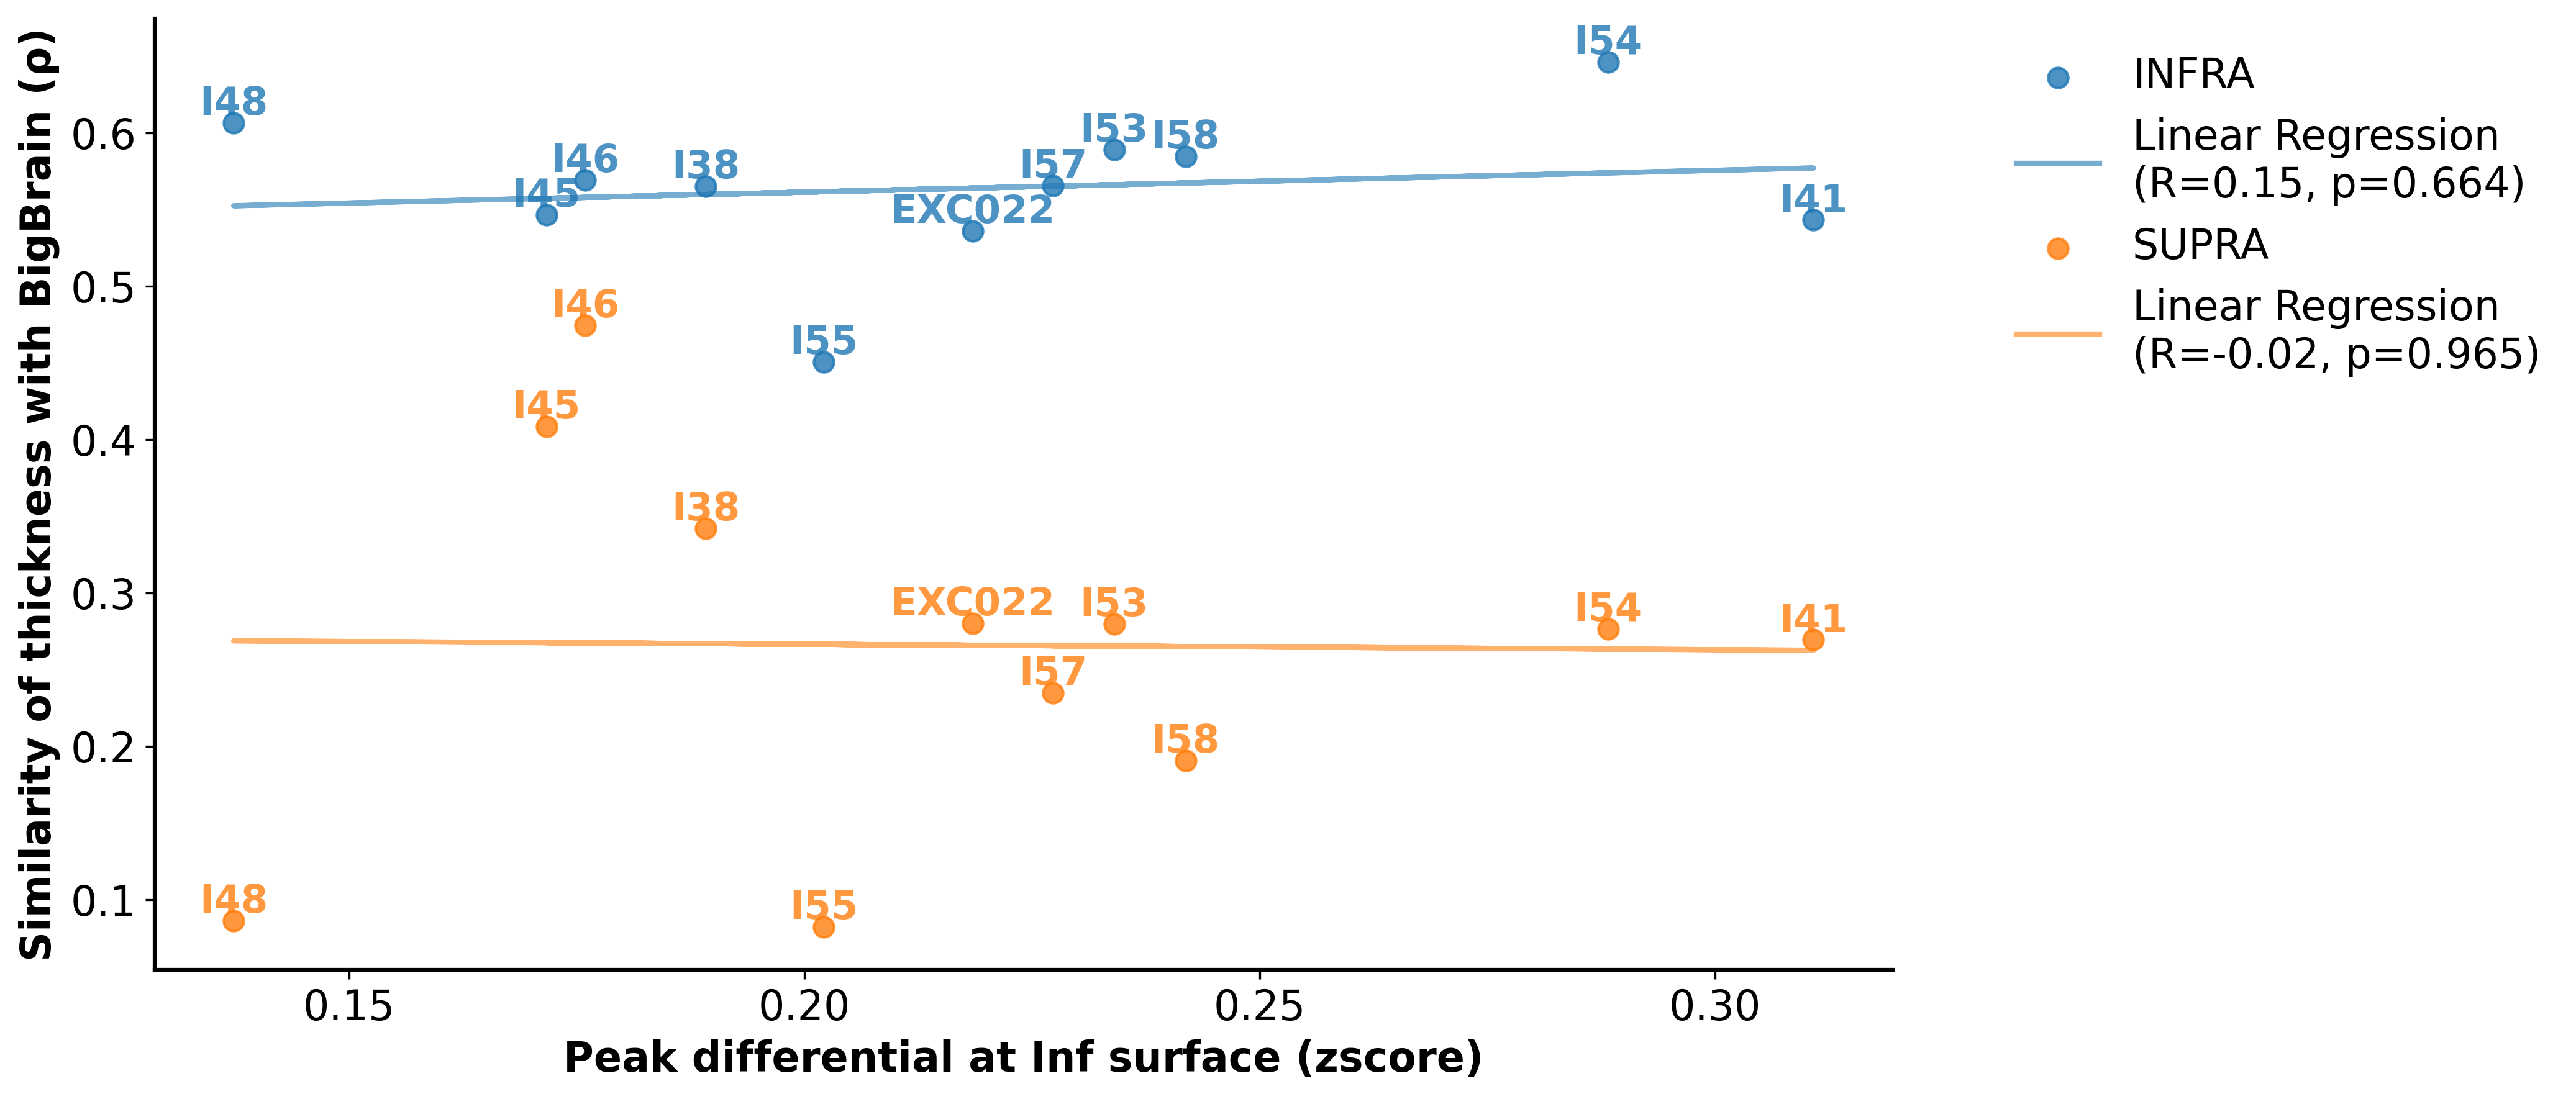

In [12]:

#load the correlation data (from visualize_brain.ipynb)
#/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/visualization
'''
with open('/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/visualization/thickness_corr_wrt_bigbrain_32k.pkl', 'rb') as f:
    data = pickle.load(f)
    subject_names_corr = data['subject_names']
    thickness_corr_wrt_bigbrain = data['thickness_corr_wrt_bigbrain']

'''
with open('/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/visualization/thickness_corr_wrt_bigbrain.pkl', 'rb') as f:
    data = pickle.load(f)
    subject_names_corr = data['subject_names']
    thickness_corr_wrt_bigbrain = data['thickness_corr_wrt_bigbrain']

#get the reorder index of the subject names_corr[hemi] in subject_names
reorder_index = [subject_names.index(subject) for subject in subject_names_corr[hemi]]
#reorder subject_names with the reorder_index
subject_names_reordered = [subject_names[i] for i in reorder_index]
print('new',len(subject_names_reordered),subject_names_reordered)


fontsize = 16
voxels_all = [np.abs(at_inf_surface)]

plt.figure(figsize=(14,6), dpi=300)
for i, independent_variable in enumerate(voxels_all):
    var_= independent_variable[reorder_index]#this should be reordered so that it matches with the thickness_corr_wrt_bigbrain
    # Set high DPI for better quality

    for j, layer_type in enumerate(['infra','supra']):
        var_wo_bigbrain = np.array(var_[:-1])
        thickness_corr_wrt_bigbrain_wo_bigbrain = np.array(thickness_corr_wrt_bigbrain[hemi][layer_type][:-1])
        subject_names_wo_bigbrain = subject_names_reordered[:-1]
        
        plt.scatter(var_wo_bigbrain, thickness_corr_wrt_bigbrain_wo_bigbrain, 
                    label=layer_type.upper(), s=60, alpha=0.8)
        #calculate linear regression
        slope, intercept, r_value, p_value, std_err = linregress(var_wo_bigbrain, thickness_corr_wrt_bigbrain_wo_bigbrain)
        
        #plot the linear regression
        plt.plot(var_wo_bigbrain, slope*var_wo_bigbrain + intercept, 
                label=f'Linear Regression\n(R={r_value:.2f}, p={p_value:.3f})', linewidth=2, alpha=0.6)
        for i, subject in enumerate(subject_names_wo_bigbrain):
            plt.annotate(subject, (var_wo_bigbrain[i], thickness_corr_wrt_bigbrain_wo_bigbrain[i]), 
                        fontsize=fontsize-1, ha='center', va='bottom', alpha=0.8, fontweight='bold',
                        color=plt.gca().collections[-1].get_facecolors()[0])


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=fontsize)  

plt.xlabel(f'Peak differential at {LAYER_TYPE.capitalize()} surface (zscore)', fontsize=fontsize, fontweight='bold')
plt.ylabel('Similarity of thickness with BigBrain (ρ)', fontsize=fontsize, fontweight='bold')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#only set the minimum of x-axis

# Set fewer ticks on x-axis
plt.locator_params(axis='x', nbins=4)

#remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.tight_layout()
#save the figure
SUBPATH = 'corr_wrt_bigbrain_figure'
#create subfolder if it doesn't exist
#os.makedirs(SUBPATH, exist_ok=True)
#plt.savefig(f'{SUBPATH}/{hemi}_thickness_corr_wrt_bigbrain_{layer_type}_{RESOLUTION}.png', dpi=300)
#
#plt.close()


In [13]:
# Atlas setup
import nibabel as nib
atlas_path = '/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/parcellation/schaefer2018/Schaefer2018_400Parcels_17Networks_order.dlabel.nii'
atlas = nib.load(atlas_path).get_fdata()[0].astype(int)
atlas_data_lh = atlas[:len(atlas)//2]
atlas_data_rh = atlas[len(atlas)//2:]
atlas_data_rh = atlas_data_rh - np.min(atlas_data_rh[atlas_data_rh != 0]) + 1
atlas_data_rh[atlas_data_rh <= 0] = 0
mask_lh = atlas_data_lh > 0
mask_rh = atlas_data_rh > 0
print(np.sum(mask_lh),np.sum(mask_rh))

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


29298 29308


In [14]:
print(zero_index)
print(tmp.shape)
print(dist_array)
print(dist_array[zero_index])
print(dist_array_avg)
print(dist_array_avg[zero_index])

7
(15, 163842)
[ 0.9   0.78  0.66  0.54  0.42  0.3   0.18  0.06 -0.06 -0.18 -0.3  -0.42
 -0.54 -0.66 -0.78 -0.9 ]
0.06
[ 0.84  0.72  0.6   0.48  0.36  0.24  0.12  0.   -0.12 -0.24 -0.36 -0.48
 -0.6  -0.72 -0.84]
0.0


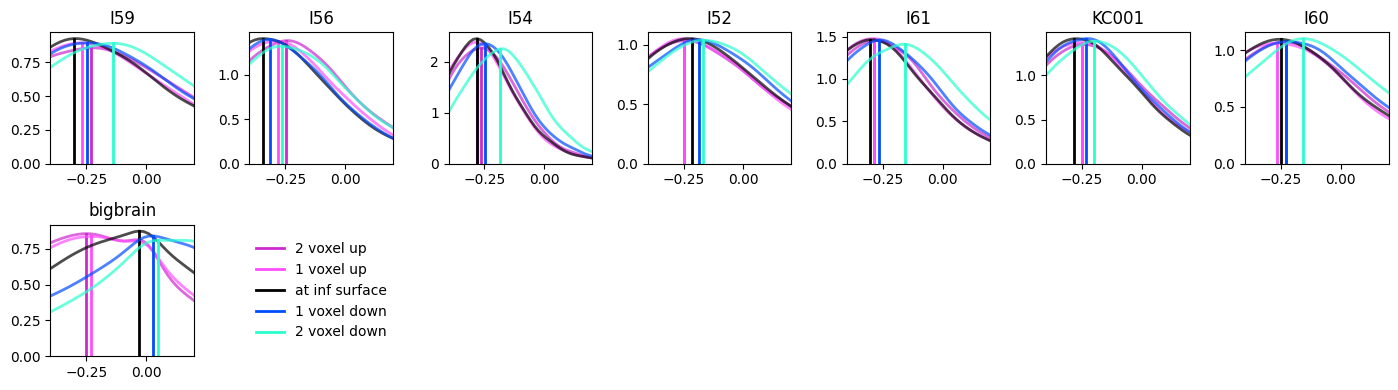

0.12393619450115259 0.791211547328438
-0.13450462006594113 0.7737177726894724
[7 3 6 0 2 5 4 1]

Processing layer: supra
bigbrain supra exists
I52 supra exists
I60 supra exists
I59 supra exists
I54 supra exists
KC001 supra exists
I61 supra exists
I56 supra exists


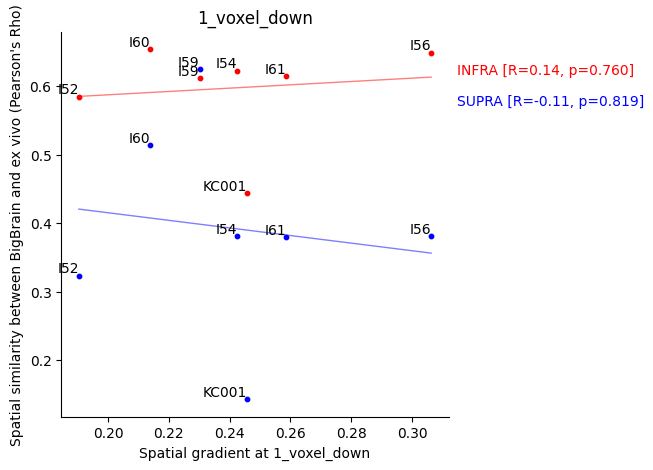

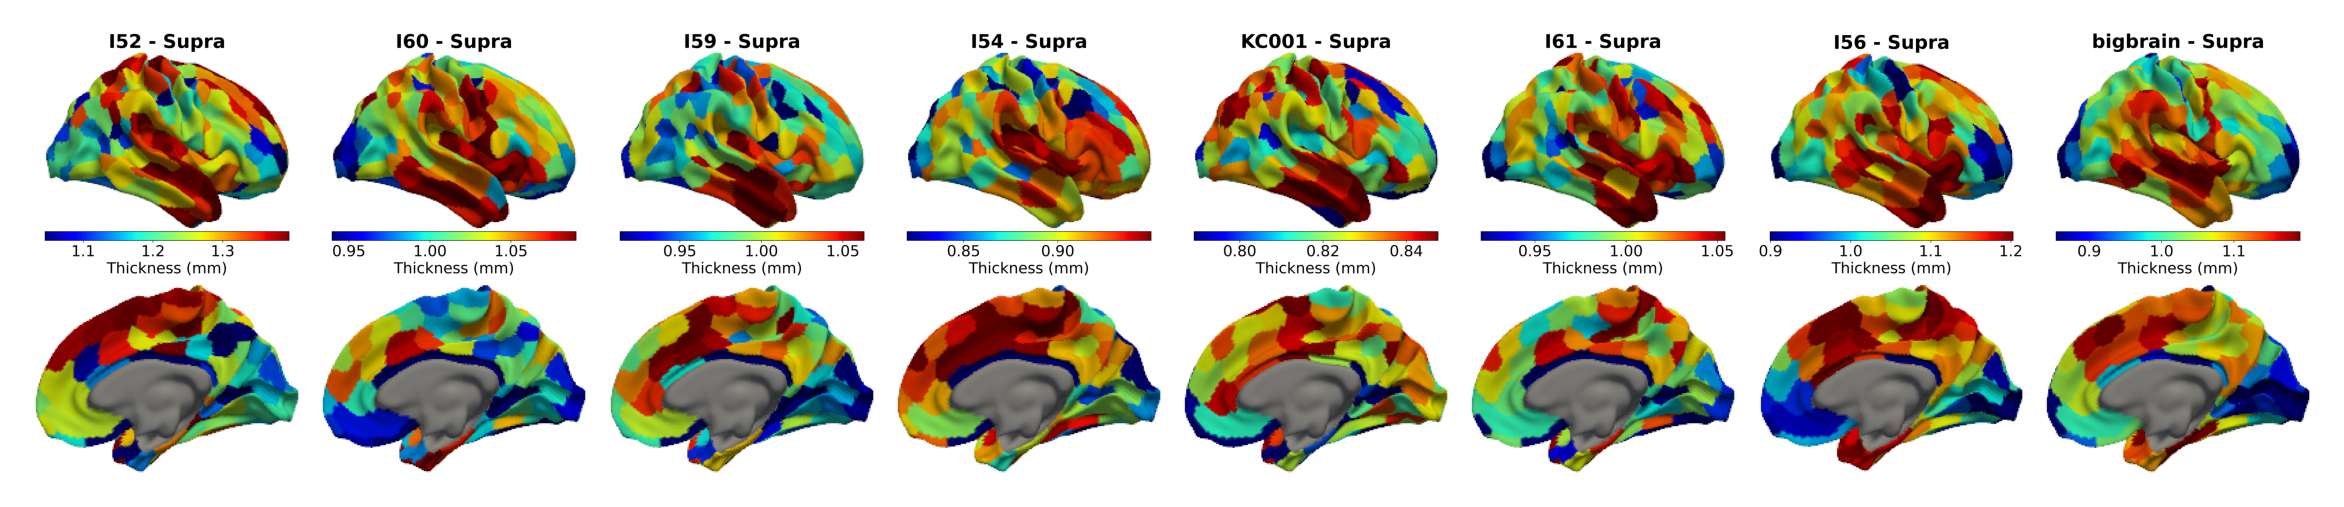


Processing layer: infra
bigbrain infra exists
I52 infra exists
I60 infra exists
I59 infra exists
I54 infra exists
KC001 infra exists
I61 infra exists
I56 infra exists


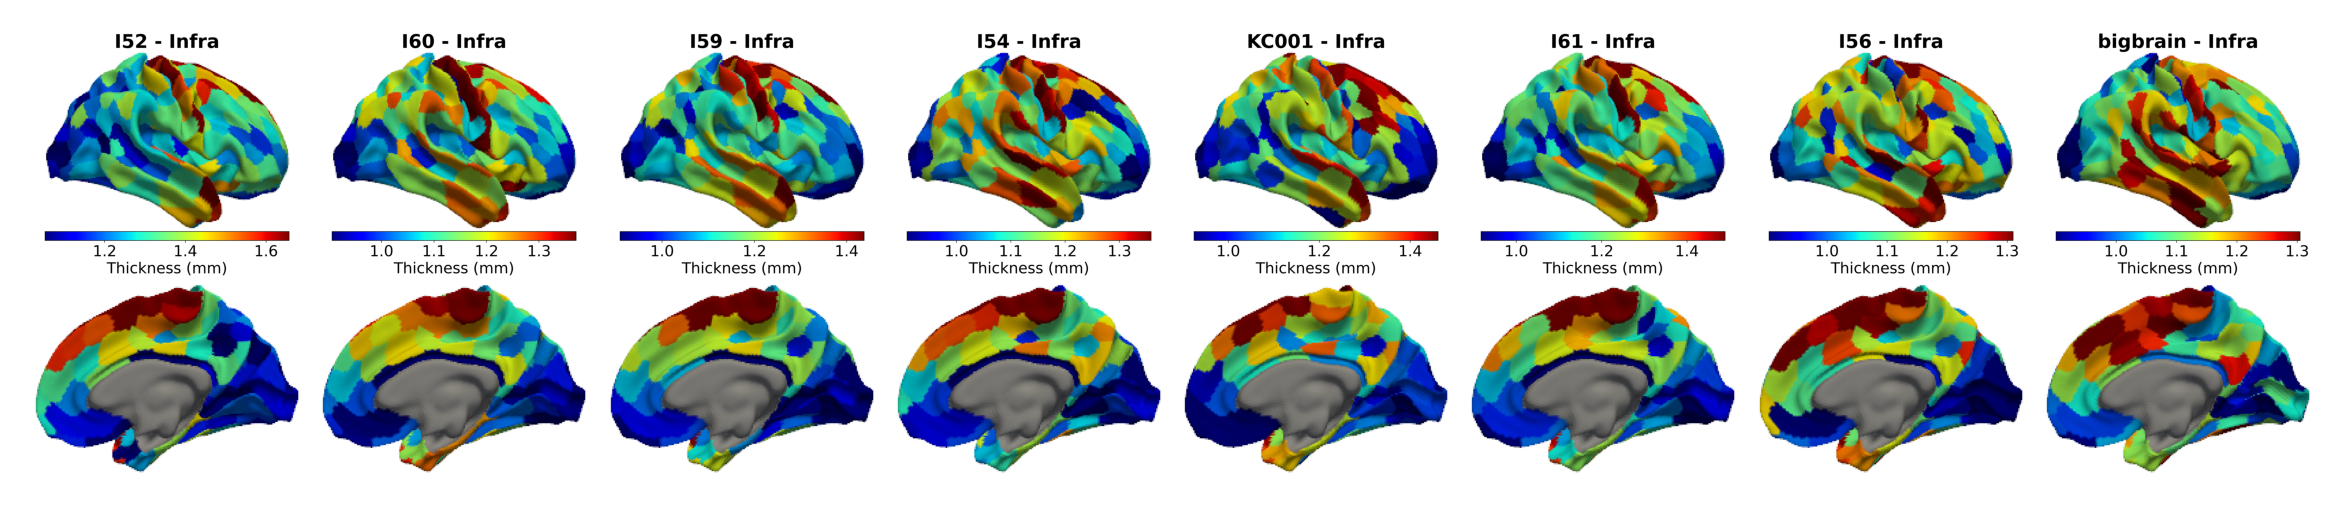

In [28]:
#for all +/-3,2,1, and inf
# Plot KDE distributions for each subject
hemi = 'rh'
target_voxel = '1_voxel_down'


subject_data = lh_intensity_data_uncut if hemi == 'lh' else rh_intensity_data_uncut
subject_names = lh_subject_names if hemi == 'lh' else rh_subject_names
n_subjects = len(subject_data)

fig, axes = plt.subplots(2, 7, figsize=figure_size_kde)
axes = axes.flatten()


# Storage for peak distances
peak_distances_all_subjects = {
    '2_voxel_up': [],
    '1_voxel_up': [],
    'at_surface': [],
    '1_voxel_down': [],
    '2_voxel_down': [],
    '3_voxel_down': [],
    '4_voxel_down': [],
}

# Define positions for analysis
#before this it was flipped.. 100725 DJ
#zero_index-2 should be going up because the data direction is from pial surface to white surface
positions = [
    (zero_index-2, f'{2} voxel up', '2_voxel_up'),
    (zero_index-1, f'{1} voxel up', '1_voxel_up'),
    (zero_index, f'at {LAYER_TYPE} surface', 'at_surface'),
    (zero_index+1, f'{1} voxel down', '1_voxel_down'),
    (zero_index+2, f'{2} voxel down', '2_voxel_down'),

]
zero_index_at = 0;
# Create gradient colors for each position
n_positions = len(positions)
colors = plt.cm.jet(np.linspace(0, 1, 6))
# Make the at_surface color black
colors[zero_index_at] = [0, 0, 0, 1]  # Red color for at_surface position
#
colors = [
    [0.8,0.16129032,0.80645161,1],
    [1,0.3,1,1],
    [0, 0, 0, 1],
    [0.0, 0.3, 1.0, 1.0],
    [0.16129032, 1.0, 0.80645161, 1.0],

]
for i, tmp in enumerate(subject_data):
    ax = axes[i]
    tmp = np.where(~np.isnan(tmp), tmp, 0)  # Remove NaN values

    min_val = int(np.nanmin(tmp))
    max_val = int(np.nanmax(tmp))
    if hemi == 'lh':
        mask = mask_lh
    else:
        mask = mask_rh
    for j, (pos_idx, label, key) in enumerate(positions):

        if tmp.shape[1] != mask.shape[0]:
            tmp_kde = tmp[pos_idx,:]# this is because of bigbrain. just skip masking on bigbrain
        else:   
            tmp_kde = tmp[pos_idx, mask]
        #check if there is any Nan values
        #x_range = np.linspace(kde_x_range[0], kde_x_range[1], kde_n_points)
        x_range = np.linspace(min_val, max_val, kde_n_points)
        kde = gaussian_kde(tmp_kde)
        kde_vals = kde(x_range)
        line = ax.plot(x_range, kde_vals, alpha=0.7, linewidth=2, label=label, color=colors[j])
        # Add peak indicator and store peak distance
        peak_idx = np.argmax(kde_vals)
        peak_x, peak_y = x_range[peak_idx], kde_vals[peak_idx]

        if  j== zero_index_at:
            ax.plot([peak_x, peak_x], [0, peak_y], '-', alpha=1, 
                    linewidth=2, color=colors[j])
        else:
            ax.plot([peak_x, peak_x], [0, peak_y], '-', alpha=1, 
                    linewidth=2, color=colors[j])
        
        #isn't peak_x median?
        peak_x = np.median(tmp_kde)
        peak_distances_all_subjects[key].append(peak_x)
    
    if do_zscore:
        ax.set_xlim(-0.4,0.2)
        #ax.set_xlim(-1.5,1.5)
    ax.set_ylim(bottom=0)
    ax.set_title(f'{subject_names[i]}')

# Add legend
if n_subjects < len(axes):
    legend_ax = axes[n_subjects]
    legend_ax.axis('off')
    for j, (pos_idx, label, key) in enumerate(positions):
        legend_ax.plot([], [], alpha=1, linewidth=2, label=label, color=colors[j])
    legend_ax.legend(loc='center', frameon=False)

# Hide remaining empty subplots
for j in range(n_subjects + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



'''
with open('/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/visualization/thickness_corr_wrt_bigbrain.pkl', 'rb') as f:
    data = pickle.load(f)
    subject_names_corr = data['subject_names']
    thickness_corr_wrt_bigbrain = data['thickness_corr_wrt_bigbrain']

'''
with open('/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/layer_project/cortical_layer/jupyter-notebook/081925_qc_native/thickness_corr_wrt_bigbrain.pkl', 'rb') as f:
    data = pickle.load(f)
    subject_names_corr = data['subject_names']
    thickness_wrt_bigbrain = data['thickness_corr_wrt_bigbrain']
    #ylabel_name = 'MI'#or "Rho"(Correlation with BigBrain')
    ylabel_name = "Spatial similarity between BigBrain and ex vivo (Pearson's Rho)"
    #need to reorder this data with the lh_subject_names and rh_subject_names
    rh_index = [rh_subject_names.index(subject) for subject in subject_names_corr['rh']]
    lh_index = [lh_subject_names.index(subject) for subject in subject_names_corr['lh']]
    thickness_wrt_bigbrain['rh']['supra'] = [thickness_wrt_bigbrain['rh']['supra'][i] for i in rh_index]
    thickness_wrt_bigbrain['lh']['supra'] = [thickness_wrt_bigbrain['lh']['supra'][i] for i in lh_index]
    thickness_wrt_bigbrain['rh']['infra'] = [thickness_wrt_bigbrain['rh']['infra'][i] for i in rh_index]
    thickness_wrt_bigbrain['lh']['infra'] = [thickness_wrt_bigbrain['lh']['infra'][i] for i in lh_index]



from scipy.stats import spearmanr
grad_diff = np.abs(np.array(peak_distances_all_subjects[target_voxel]))
plt.figure(figsize=(5,5))


#color by layer type
colors = ['r','b']
for k,layer_type in enumerate(['infra','supra']):
    thickness_wrt_bigbrain_wo_bigbrain = np.array(thickness_wrt_bigbrain[hemi][layer_type][:-1])
    plt.scatter(grad_diff[:-1], thickness_wrt_bigbrain_wo_bigbrain, s=10, marker='o', c=colors[k])
    for i in range(len(grad_diff[:-1])):
        plt.text(grad_diff[i], thickness_wrt_bigbrain_wo_bigbrain[i], subject_names[i], fontsize=10, ha='right', va='bottom')
    #do linear regression
    slope, intercept, r_value, p_value, std_err = linregress(grad_diff[:-1], thickness_wrt_bigbrain_wo_bigbrain)
    print(r_value, p_value)

    sp_rho, sp_p_value = spearmanr(grad_diff[:-1], thickness_wrt_bigbrain_wo_bigbrain)
    x_vals = np.linspace(np.min(grad_diff[:-1]), np.max(grad_diff[:-1]), 100)
    plt.plot(x_vals, slope * x_vals + intercept, color=colors[k], linestyle='-', linewidth=1, alpha=0.5)
    # Place the annotation outside the plot box, e.g., to the right of the axes
    plt.gca().annotate(
        f'{layer_type.upper()} [R={sp_rho:.2f}, p={sp_p_value:.3f}]',
        xy=(1.02, 0.9 - k*0.08), xycoords='axes fraction',
        ha='left', va='center', fontsize=10, color=colors[k]
    )
plt.title(target_voxel)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

if data_type == 'diff':
    #plt.xlabel('Difference between peak of \n at surface and 1 voxel down')
    plt.xlabel(f'Spatial gradient at {target_voxel}')
elif data_type == 'raw':
    #plt.xlabel('Difference between peak of \n 1/2 voxel up and 1/2 voxel down')
    plt.xlabel(f'Raw at {target_voxel}')
plt.ylabel(ylabel_name)



'''
from scipy.stats import spearmanr
fig, axes = plt.subplots(2, 7, figsize=figure_size_kde)
axes = axes.flatten()

ax_lim = 5

for i, tmp in enumerate(subject_data):
    ax = axes[i]
    tmp = np.where(~np.isnan(tmp), tmp, 0)  # Remove NaN values
    tmp_at_zero = tmp[zero_index,:]
    tmp_at_one_down = tmp[zero_index+1,:]

    ax.scatter(tmp_at_zero, tmp_at_one_down, alpha=0.05, s=1, c='k')
    #plot r value and p value and lienar regression line    
    slope, intercept, r_value, p_value, std_err = linregress(tmp_at_zero, tmp_at_one_down)  

    ax.plot(np.linspace(-ax_lim, ax_lim, 100), slope*np.linspace(-ax_lim, ax_lim, 100) + intercept, 'r-', linewidth=1,alpha=0.5)
    ax.text(0.8, 0.9, f'R={r_value:.2f}\n p={p_value:.3f}', transform=ax.transAxes, ha='center', va='center', fontsize=9, color='r')
    ax.set_xlabel('at surface')
    ax.set_ylabel('1 voxel down')
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_xticks([-ax_lim, 0, ax_lim])
    ax.set_yticks([-ax_lim, 0, ax_lim])
    ax.set_title(f'{subject_names[i]}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)




# Hide remaining empty subplots
for j in range(n_subjects, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

'''


from PIL import Image
import io

indices_increasing_order = np.argsort(grad_diff)
print(indices_increasing_order)
# Convert lh_subject_names to a numpy array if it's a list, so it can be indexed with an array
if hemi == 'lh':
    lh_subject_names_arr = np.array(lh_subject_names)
    subject_names_reorder = (lh_subject_names_arr[indices_increasing_order])
else:
    rh_subject_names_arr = np.array(rh_subject_names)
    subject_names_reorder = (rh_subject_names_arr[indices_increasing_order])

# Get the individual subject plots from the folder
figure_path = f'../visualization/figures/individual_plots_{hemi}'

for layer_type in ['supra', 'infra']:
    print(f"\nProcessing layer: {layer_type}")
    img_buffer = []
    for i, subject in enumerate(subject_names_reorder):
        plot_path = f'{figure_path}/{subject}_{layer_type}_{hemi}.png'
        if os.path.exists(plot_path):
            print(f'{subject} {layer_type} exists')
            if subject == 'bigbrain':
                # skip
                continue
            # Load the image at highest quality using PIL
            img = Image.open(plot_path)
            img_buffer.append(img)
        else:
            print(f'{subject} {layer_type} does not exist')

    # add bigbrain to the last one
    bigbrain_path = f'{figure_path}/bigbrain_{layer_type}_{hemi}.png'
    bigbrain_img = Image.open(bigbrain_path)
    img_buffer.append(bigbrain_img)

    # Plot the images together in subplots with higher quality
    fig, axes = plt.subplots(1, 14, figsize=(13.5,2), dpi=300)  # Single row, adjust figsize for clarity
    axes = axes.flatten()
    for i, img in enumerate(img_buffer):
        axes[i].imshow(img)
        axes[i].axis('off')
    # Remove unused subplots
    for j in range(len(img_buffer), len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(pad=0.5)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()
